In [2]:
## Demo of fitdistrplus on normal data:
library(fitdistrplus)

set.seed(1)
myfit.norm <- fitdist(rnorm(1000), "norm", method="mle")
summary(myfit.norm)

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
        estimate Std. Error
mean -0.01164814 0.03271054
sd    1.03439825 0.02312975
Loglikelihood:  -1452.758   AIC:  2909.517   BIC:  2919.332 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1


Parametric bootstrap medians and 95% percentile CI 
          Median        2.5%      97.5%
mean -0.01206123 -0.07533914 0.05253027
sd    1.03443582  0.98777393 1.07942481

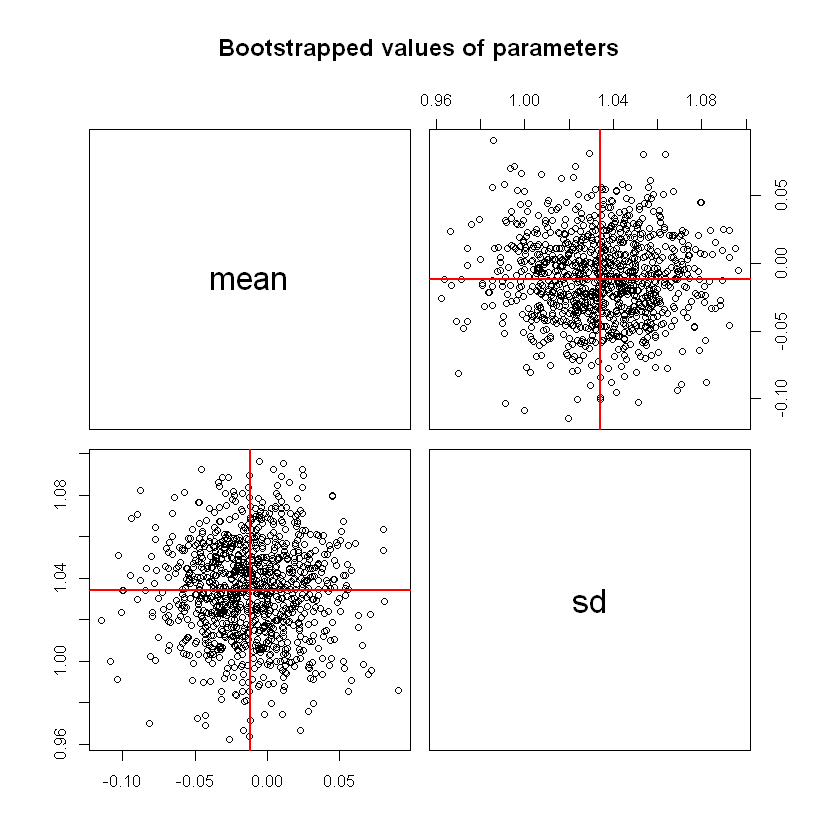

In [3]:
## Parametric boostrap:
myfit.norm.boot <- bootdist(myfit.norm, bootmethod="param", niter=1000)
summary(myfit.norm.boot)

## Plot bootstrapped:
plot(myfit.norm.boot, trueval=myfit.norm$estimate)

In [4]:
## Extract bootstrapped estimations:
boot.estim <- myfit.norm.boot$estim
head(boot.estim)

mean         sd      
1 -0.028535226 1.075187
2  0.004166724 1.066086
3  0.005602509 1.073889
4 -0.032487971 1.022917
5 -0.023792068 1.012045
6 -0.032889852 1.074179

In [5]:
## Fitting to binomial distribution, when size is known as 6:
myfit.binom <- fitdist(data=c(2,3,4,2,3), dist="binom", 
                       fix.arg=list(size=6), start=list(prob=0.3))
summary(myfit.binom)

Fitting of the distribution ' binom ' by maximum likelihood 
Parameters : 
      estimate Std. Error
prob 0.4666663 0.09108363
Fixed parameters:
     value
size     6
Loglikelihood:  -6.612084   AIC:  15.22417   BIC:  14.83361 

In [6]:
## Fitting to user-defined distribution with fitdistrplus needs some extra efforts.
## A demo:
## mydistr(x|mu) = N(x|mean=mu, sd=5)

library(fitdistrplus)

dmydistr <- function(x, mu) dnorm(x, mean=mu, sd=5)
pmydistr <- function(q, mu) pnorm(q, mean=mu, sd=5)
qmydistr <- function(p, mu) qnorm(p, mean=mu, sd=5)

set.seed(1)
x <- rnorm(1000, mean=2, sd=5)

## Using fitdistrplus for user-defined distribution with MLE method:
myfit.mle <- fitdist(x, "mydistr", start = list(mu = 1), method="mle")
myfit.mle

Fitting of the distribution ' mydistr ' by maximum likelihood 
Parameters:
   estimate Std. Error
mu 1.941759  0.1581139

In [7]:
## Using fitdistrplus for user-defined distribution with MME method:

## Need to provide the empirical moment, theoretical moment,
## and which order of moment to match:

## Empirical moment：
memp <- function(x, order) sum(x^order)/length(x)      

## Theoretical moments (I only provide first two...):
mmydistr <- function(order, mu){
    if (order == 1){mom = mu}
    else if (order == 2){mom = mu^2+25}
    else {mom = NA}
    return(mom)
}

## to tell fitdist to match the 1st order moment
order <- c(1)   

myfit.mme <- fitdist(x, "mydistr", order=order, memp=memp, 
                     start = list(mu = 1), method="mme")
myfit.mme

Fitting of the distribution ' mydistr ' by matching moments 
Parameters:
   estimate
mu 1.941759

In [9]:
## Fitting to rayleigh distribution (defined in extraDistr):
library(fitdistrplus)
library(extraDistr)

## A look at the rayleigh density:
# x.grid <- seq(0, 10, 0.1)
# sigma <- 2
# y.grid <- drayleigh(x.grid, sigma=sigma)
# plot(x.grid, y.grid)
# lines(x.grid, x.grid/sigma^2 * exp(-x.grid^2/(2*sigma^2)))

In [10]:
## Fitting rayleigh of extraDistr:
memp <- function(x, order) sum(x^order)/length(x)
mrayleigh <- function(order, sigma) sigma*sqrt(pi/2)

set.seed(1)
dat <- rrayleigh(100, sigma=2)

rayleigh.mle <- fitdist(dat, "rayleigh", start = list(sigma = 5), method="mle")
rayleigh.mle

rayleigh.mme <- fitdist(dat, "rayleigh", order=c(1), memp=memp, start = list(sigma = 1), method="mme")
rayleigh.mme

Fitting of the distribution ' rayleigh ' by maximum likelihood 
Parameters:
      estimate Std. Error
sigma 1.874787 0.09373925

Fitting of the distribution ' rayleigh ' by matching moments 
Parameters:
      estimate
sigma 1.913208